# **Projeto de insight do Meigaron**
https://www.kaggle.com/harlfoxem/housesalesprediction
--
https://sejaumdatascientist.com/os-5-projetos-de-data-science-que-fara-o-recrutador-olhar-para-voce/

--
O Projeto de Insight cobre 5 passos do roadmap de resolução de problemas em Data Science, sendo esses: 
* A Questão de Negócio,
* O Entendimento do Negócio,
* A Coleta de Dados(pego do Kaggle, porém é bom lembrar que nessa etapa é necessário dominio de SQL)
* A Limpeza de Dados nt:é só nessa parte que eu começo a programar
* A Exploração de Dados.

In [ ]:
import pandas as pd


In [ ]:

dados_brutos = pd.read_csv('https://raw.githubusercontent.com/PauloHIG/Estudos_dataScience/main/kc_house_data.csv')#pegando direto do github, é importante que seja smepre a versão raw
display(dados_brutos)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


**Hora de pegar esses dados brutos, analisar e limpar**
É preciso perceber quais colunas mais afetam o preço das casas, muito provável que a quantidade de quartos e a localização sejam fatores importantes, porém tem 21 colunas e todas precisam ser analisadas, um exemplo: saber se a média dos preços das casas com vista para a água é maior que as sem vista para agua
em geral é preciso saber o quanto cada atributo afeta o preço da casa, penso em usar um gropby com a media dos preços

In [ ]:
dados = dados_brutos.dropna()
#display(dados_brutos.info())
#display(dados.info())
display(dados_brutos.describe())
#aparentemente não há linhas com dados nulos, mas é preciso descobrir colunas com informações não relevantes 
#como prova, o dropna não alterou o número de linhas do dataframe

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


**groupby tudo**
Minha primeira ideia antes de formular qualquer hipótese, é usar um groupby para casa coluna dos atributos da casa, e assim ver quais afetam mais o preço dela


In [ ]:
dados.groupby('waterfront').mean()['price']#usarei essa estrutura, começei com waterfront porque há apenas dois(com vista para água ou sem)
#mostrei apenas o preço que é o que me interessa
for elemento in dados:
  if elemento not in ['id','price','lat','long','data']:#tirei o lat e o long porque é necessário que os dois estejam juntos para analisar o quão a localização afeta o preço, faço isso no próximo bloco
    print(dados.groupby(elemento).mean()['price'])

date
20140502T000000    5.262515e+05
20140503T000000    4.669700e+05
20140504T000000    5.766900e+05
20140505T000000    5.809386e+05
20140506T000000    5.340479e+05
                       ...     
20150513T000000    5.116239e+05
20150514T000000    6.034363e+05
20150515T000000    4.500000e+05
20150524T000000    4.455000e+05
20150527T000000    1.310000e+06
Name: price, Length: 372, dtype: float64
bedrooms
0     4.095038e+05
1     3.176429e+05
2     4.013727e+05
3     4.662321e+05
4     6.354195e+05
5     7.865998e+05
6     8.255206e+05
7     9.511847e+05
8     1.105077e+06
9     8.939998e+05
10    8.193333e+05
11    5.200000e+05
33    6.400000e+05
Name: price, dtype: float64
bathrooms
0.00    4.481600e+05
0.50    2.373750e+05
0.75    2.945209e+05
1.00    3.470412e+05
1.25    6.212167e+05
1.50    4.093222e+05
1.75    4.548961e+05
2.00    4.578897e+05
2.25    5.336768e+05
2.50    5.535965e+05
2.75    6.602304e+05
3.00    7.084152e+05
3.25    9.703398e+05
3.50    9.319331e+05
3.75    1.1972

**Vamos olhar no mapa usando o lat e o long para descobrir alguma coisa**

In [ ]:
import plotly.express as plot

gráfico = plot.histogram(dados_brutos,x = 'price',color = 'bedrooms')#posso usar isso para identificar a importancia de cada coluna
gráfico.show()

NameError: ignored

In [ ]:
#vamos dar uma olhada nos gráficos de mapa
import plotly.graph_objects as go
mapinha = go.Figure(data=go.Scattergeo(lon=dados['long'],lat=dados['lat'],text=dados['price'],
                                       marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'square',
            colorscale = 'Greens',
            cmin = 0,
            color = dados['price'],
            cmax = dados['price'].max(),
            colorbar_title="Quanto mais claro é o tom, mais cara é a casa"
        )))
mapinha.update_layout(geo_scope='usa')
mapinha.show()


https://stackoverflow.com/questions/54613992/how-to-install-and-use-basemap-on-google-colab

https://jakevdp.github.io/PythonDataScienceHandbook/04.13-geographic-data-with-basemap.html

In [ ]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

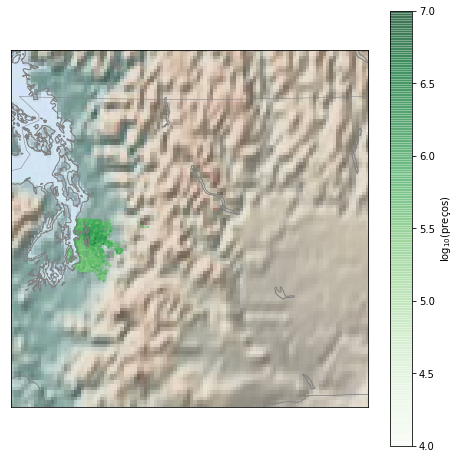

In [ ]:
#todo codigo abaixo foi copiado para testar biblioteca, no bloco de cima, tem a instalação dessa biblioteca que sempre será necessária
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
cities = dados_brutos 

# Extract the data we're interested in
lat = cities['lat'].values
lon = cities['long'].values
preços = cities['price'].values

# 1. Draw the map background
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='f', 
            lat_0=47.7, lon_0=-120.7,
            width=400000, height=400000)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lon, lat, latlon=True,
          c=np.log10(preços), s=1,
          cmap='Greens', alpha=0.5)

# 3. create colorbar and legend
plt.colorbar(label=r'$\log_{10}({\rm preços})$')
plt.clim(4, 7)
#como pode ver, a resolução fica ruim, mas nitidamente a localização é um grande fator para o preço
